## <center>CMSC6950 | Fall 2023<center>
## <center>Project: St. John's Climate Data Analysis<center>
## <center>Mohammadali Mirmojarabian, 202292543<center>
___

We want to analyze St. John's climate data. To access data source and for a comprehensive information about the data please refer to https://stjohns.weatherstats.ca/download.html.
<!-- For Frequently Asked Questions visit [here](https://www.weatherstats.ca/faq/#copying). -->

We downloaded 730 (two-year) daily climatic data points. In this specific project, we don't need to examine all measurements:
- `max_temperature` and `min_temperature`: Maximum and Minimum Temperature (**°C**)

- `avg_temperature` is the average between the daily maximum and minimum temperatures, while `avg_hourly_temperature` is the average of all the hourly temperatures within the day.

- `max_wind_speed` and `min_wind_speed`: Maximum and Minimum Wind Speed (**km/h**)

- `precipitation`: Precipitation (**mm**): The amount of rain/snow/etc. received. Snow is melted to create a water equivalent. 1cm snow is approx. 1mm of precipitation, but the exact amount depends on the snow density (e.g., corn snow vs light fluffy snow).

Other Features:
- `avg_hourly_relative_humidity`: (**%**)
- `avg_hourly_pressure_sea`: (**kPa**)
- `avg_hourly_visibility`: (**m**)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import MonthLocator, DateFormatter

In [4]:
cols = ['date',
        'max_temperature','min_temperature','avg_hourly_temperature','avg_temperature',\
        'max_wind_speed','avg_hourly_wind_speed','min_wind_speed','precipitation',\
        'avg_hourly_relative_humidity','avg_hourly_pressure_sea','avg_hourly_visibility']

df = pd.read_csv('../data/daily.csv', parse_dates=['date'], index_col=['date'], dayfirst=True, usecols=cols)
df

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,avg_hourly_relative_humidity,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,avg_hourly_pressure_sea,avg_hourly_visibility,precipitation
date,,,,,,,,,,,
2023-10-31,2.8,0.72,0.74,-1.3,92.4,25,13.38,3,100.52,15395.8,7.4
2023-10-30,6.8,3.23,3.35,-0.1,59.6,53,31.54,1,100.98,20725.0,4.4
2023-10-29,12.5,8.43,7.65,2.8,73.9,49,37.29,24,100.28,24100.0,0.0
2023-10-28,14.6,9.01,9.60,4.6,94.5,37,25.46,12,101.29,17591.7,15.6
2023-10-27,9.5,5.28,5.85,2.2,82.8,19,12.67,7,102.33,24100.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,5.3,2.37,2.35,-0.6,82.4,29,11.42,3,102.35,21270.8,18.4
2021-11-04,10.3,5.03,5.35,0.4,83.2,52,26.79,8,101.75,24100.0,0.0
2021-11-03,10.9,5.16,6.20,1.5,79.6,19,9.79,3,102.06,24100.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-10-31 to 2021-11-01
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               730 non-null    float64
 1   avg_hourly_temperature        730 non-null    float64
 2   avg_temperature               730 non-null    float64
 3   min_temperature               730 non-null    float64
 4   avg_hourly_relative_humidity  730 non-null    float64
 5   max_wind_speed                730 non-null    int64  
 6   avg_hourly_wind_speed         730 non-null    float64
 7   min_wind_speed                730 non-null    int64  
 8   avg_hourly_pressure_sea       730 non-null    float64
 9   avg_hourly_visibility         730 non-null    float64
 10  precipitation                 730 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 68.4 KB


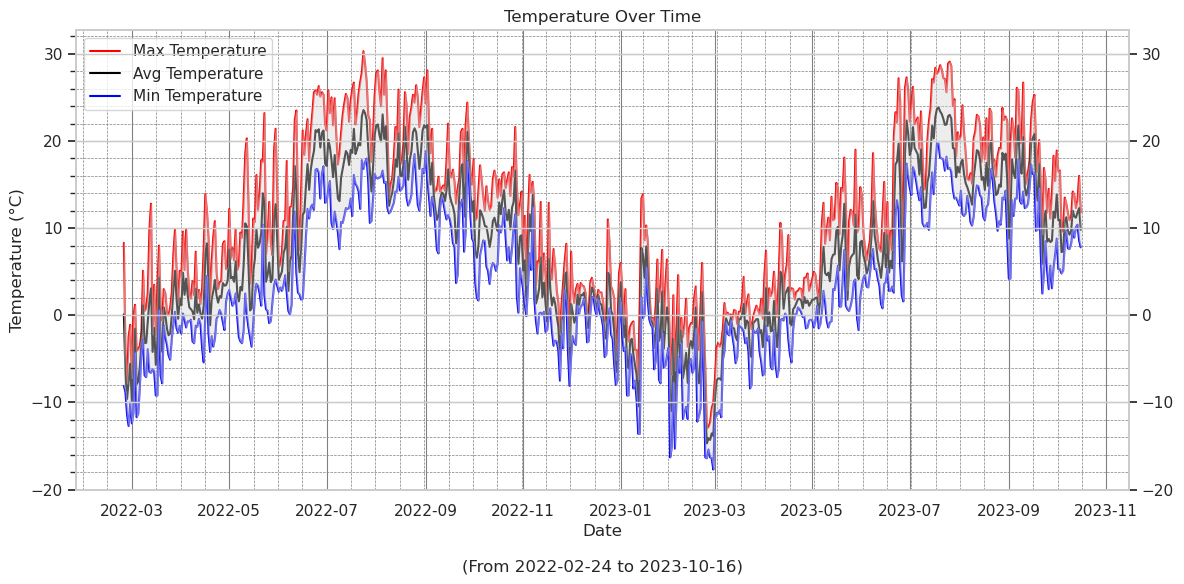

In [4]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a time series plot for temperature
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature columns with Seaborn
sns.lineplot(data=df, x=df.index, y='max_temperature', ax=ax, label='Max Temperature', color='red')
sns.lineplot(data=df, x=df.index, y='avg_temperature', ax=ax, label='Avg Temperature', color='black')
sns.lineplot(data=df, x=df.index, y='min_temperature', ax=ax, label='Min Temperature', color='blue')

# Customize the plot
ax.set_xlabel('Date\n\n(From 2022-02-24 to 2023-10-16)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Over Time')

# Set grids
ax.minorticks_on()
plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')

# Create a new axes for fill_between plot
ax_fill = ax.twinx()
# Plot fill_between
temp = df[['min_temperature', 'max_temperature', 'avg_temperature']]
ax_fill.fill_between(x=df.index, y1=temp['min_temperature'], y2=temp['max_temperature'], alpha=0.4, color='lightgray')

plt.tight_layout()
plt.savefig('../figures/First-plot-proposal.png', facecolor='w', dpi=1000)
plt.show()

## Doing Basic Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2023-10-16 to 2022-02-24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   max_temperature         600 non-null    float64
 1   avg_hourly_temperature  600 non-null    float64
 2   avg_temperature         600 non-null    float64
 3   min_temperature         600 non-null    float64
 4   max_wind_speed          600 non-null    int64  
 5   avg_hourly_wind_speed   600 non-null    float64
 6   min_wind_speed          600 non-null    int64  
 7   precipitation           600 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 42.2 KB


In [4]:
df.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,precipitation
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,11.339500,7.316550,7.535367,3.733167,36.838333,23.847683,11.23500,3.875333
std,9.439852,8.470733,8.668497,8.240108,12.513320,8.945891,7.75586,8.323442
min,-13.000000,-15.070000,-14.700000,-17.700000,12.000000,7.290000,1.00000,0.000000
25%,3.000000,0.735000,0.897500,-1.825000,28.000000,17.120000,5.00000,0.000000
50%,11.450000,6.640000,6.900000,2.550000,36.000000,23.100000,9.00000,0.400000
75%,18.825000,14.672500,14.917500,11.400000,45.000000,29.342500,16.00000,4.025000
max,30.300000,24.330000,23.850000,19.700000,83.000000,60.610000,49.00000,80.600000


## Histograms

In [3]:
def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20,50))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i], density=True, label="normalized histogram plot") # normalizes the density
        df[c].plot.density(ax=axs[i], label="probability density plot")
        axs[i].set(title=f"{c} probabilities VS. {c} values")
        axs[i].legend(loc="upper right")
        i+=1

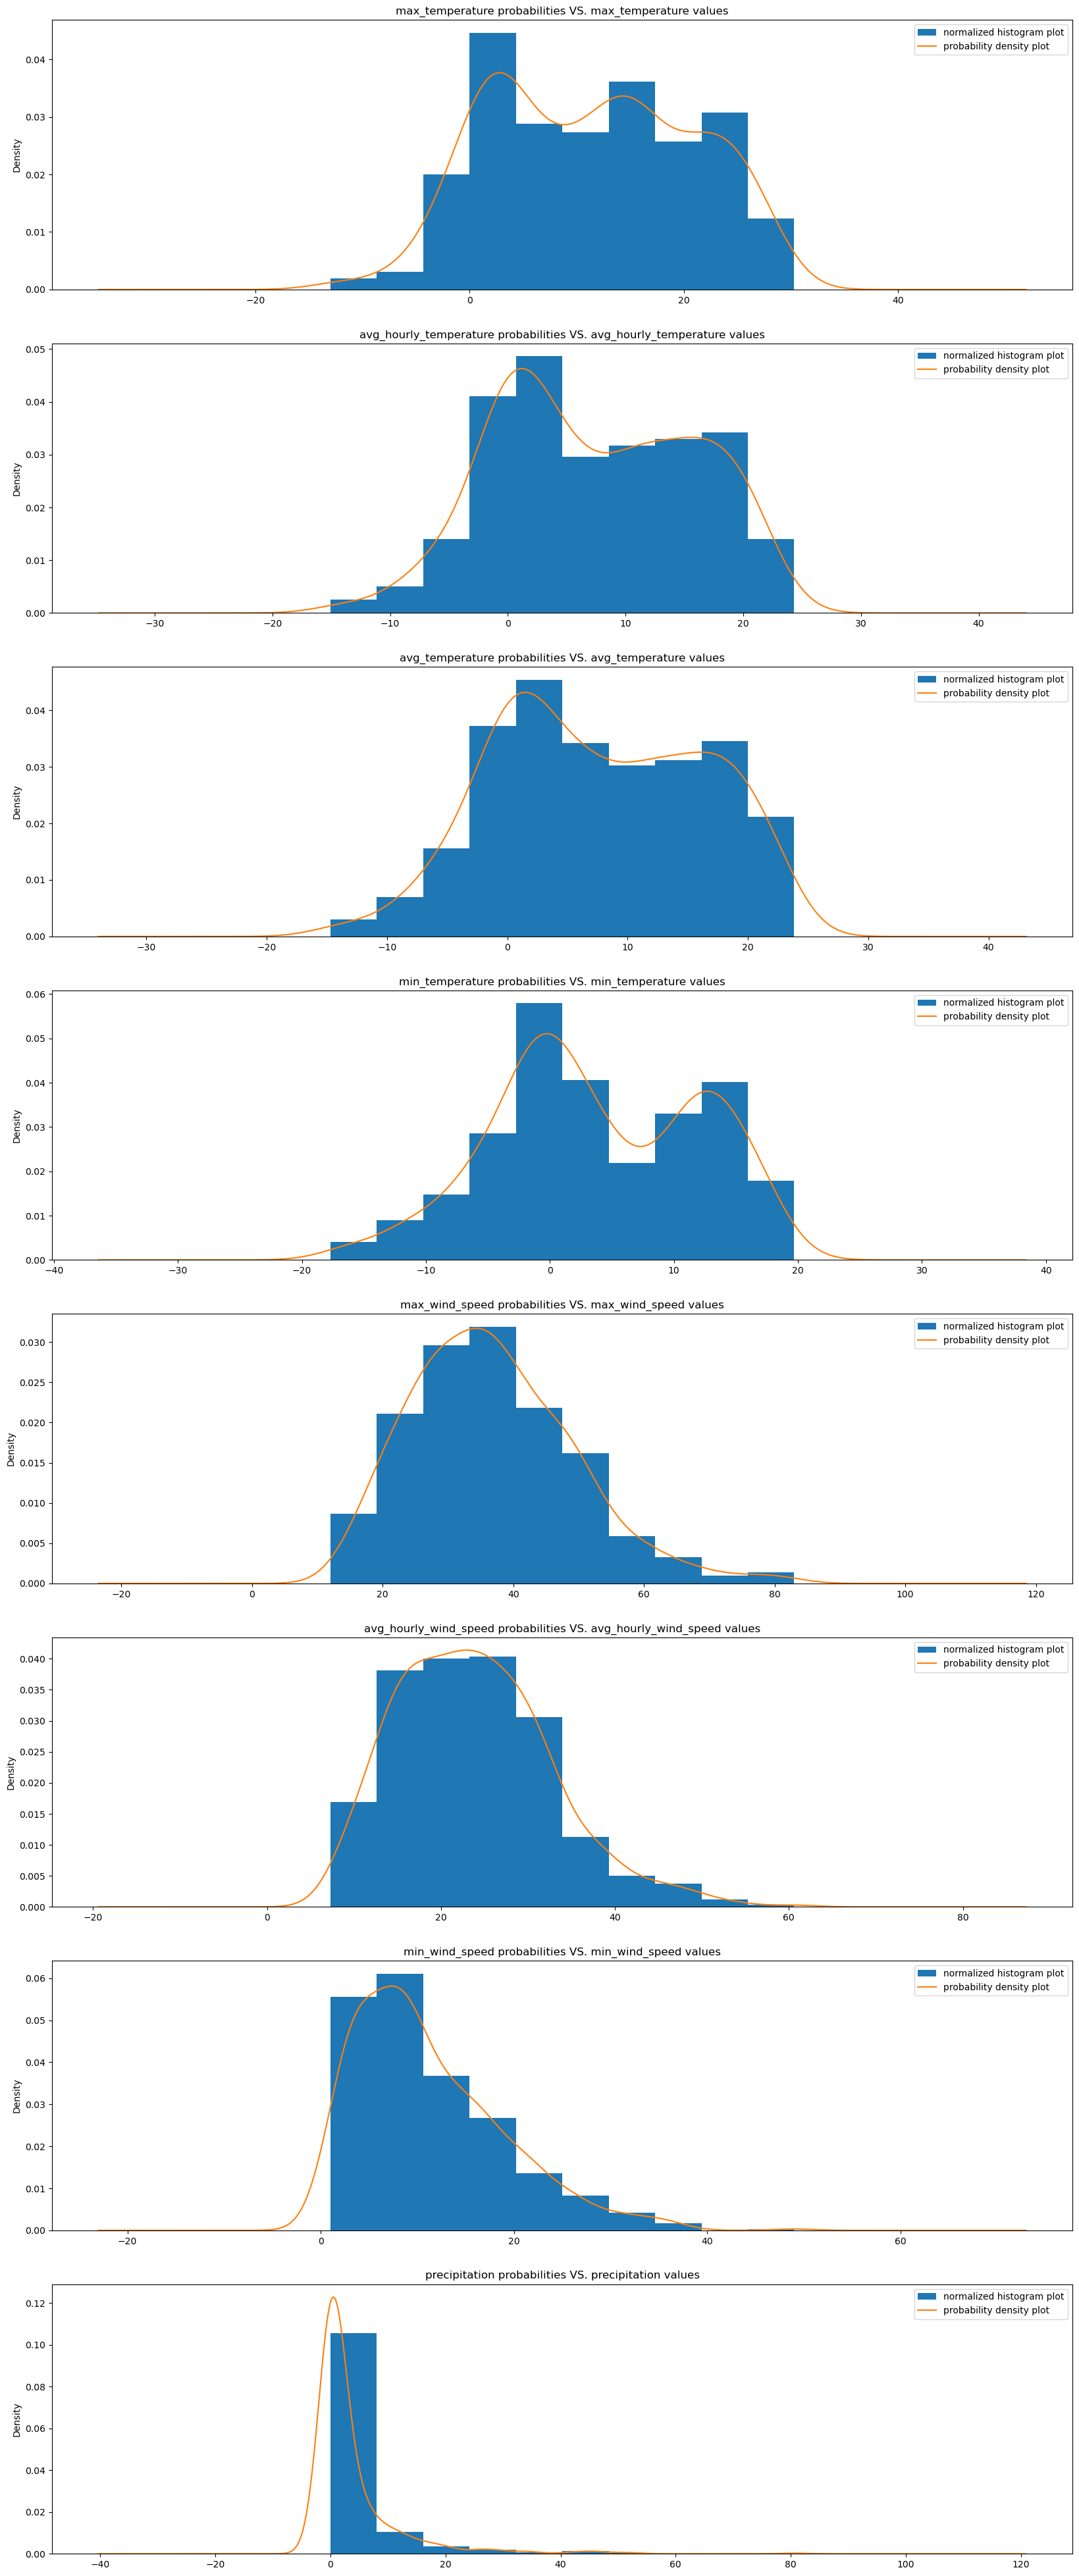

In [4]:
plot_histograms_density(df, df.columns)

## Boxplots

In [3]:
def boxplots(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20, 50))
    axs = axs.flatten()
    i=0
    for c in columns:
        df.boxplot(c, ax=axs[i], vert=False) #c = df.columns[i]: column name
        axs[i].set_title(f'Boxplot of the "{c}" data')
        i+=1
    plt.show()

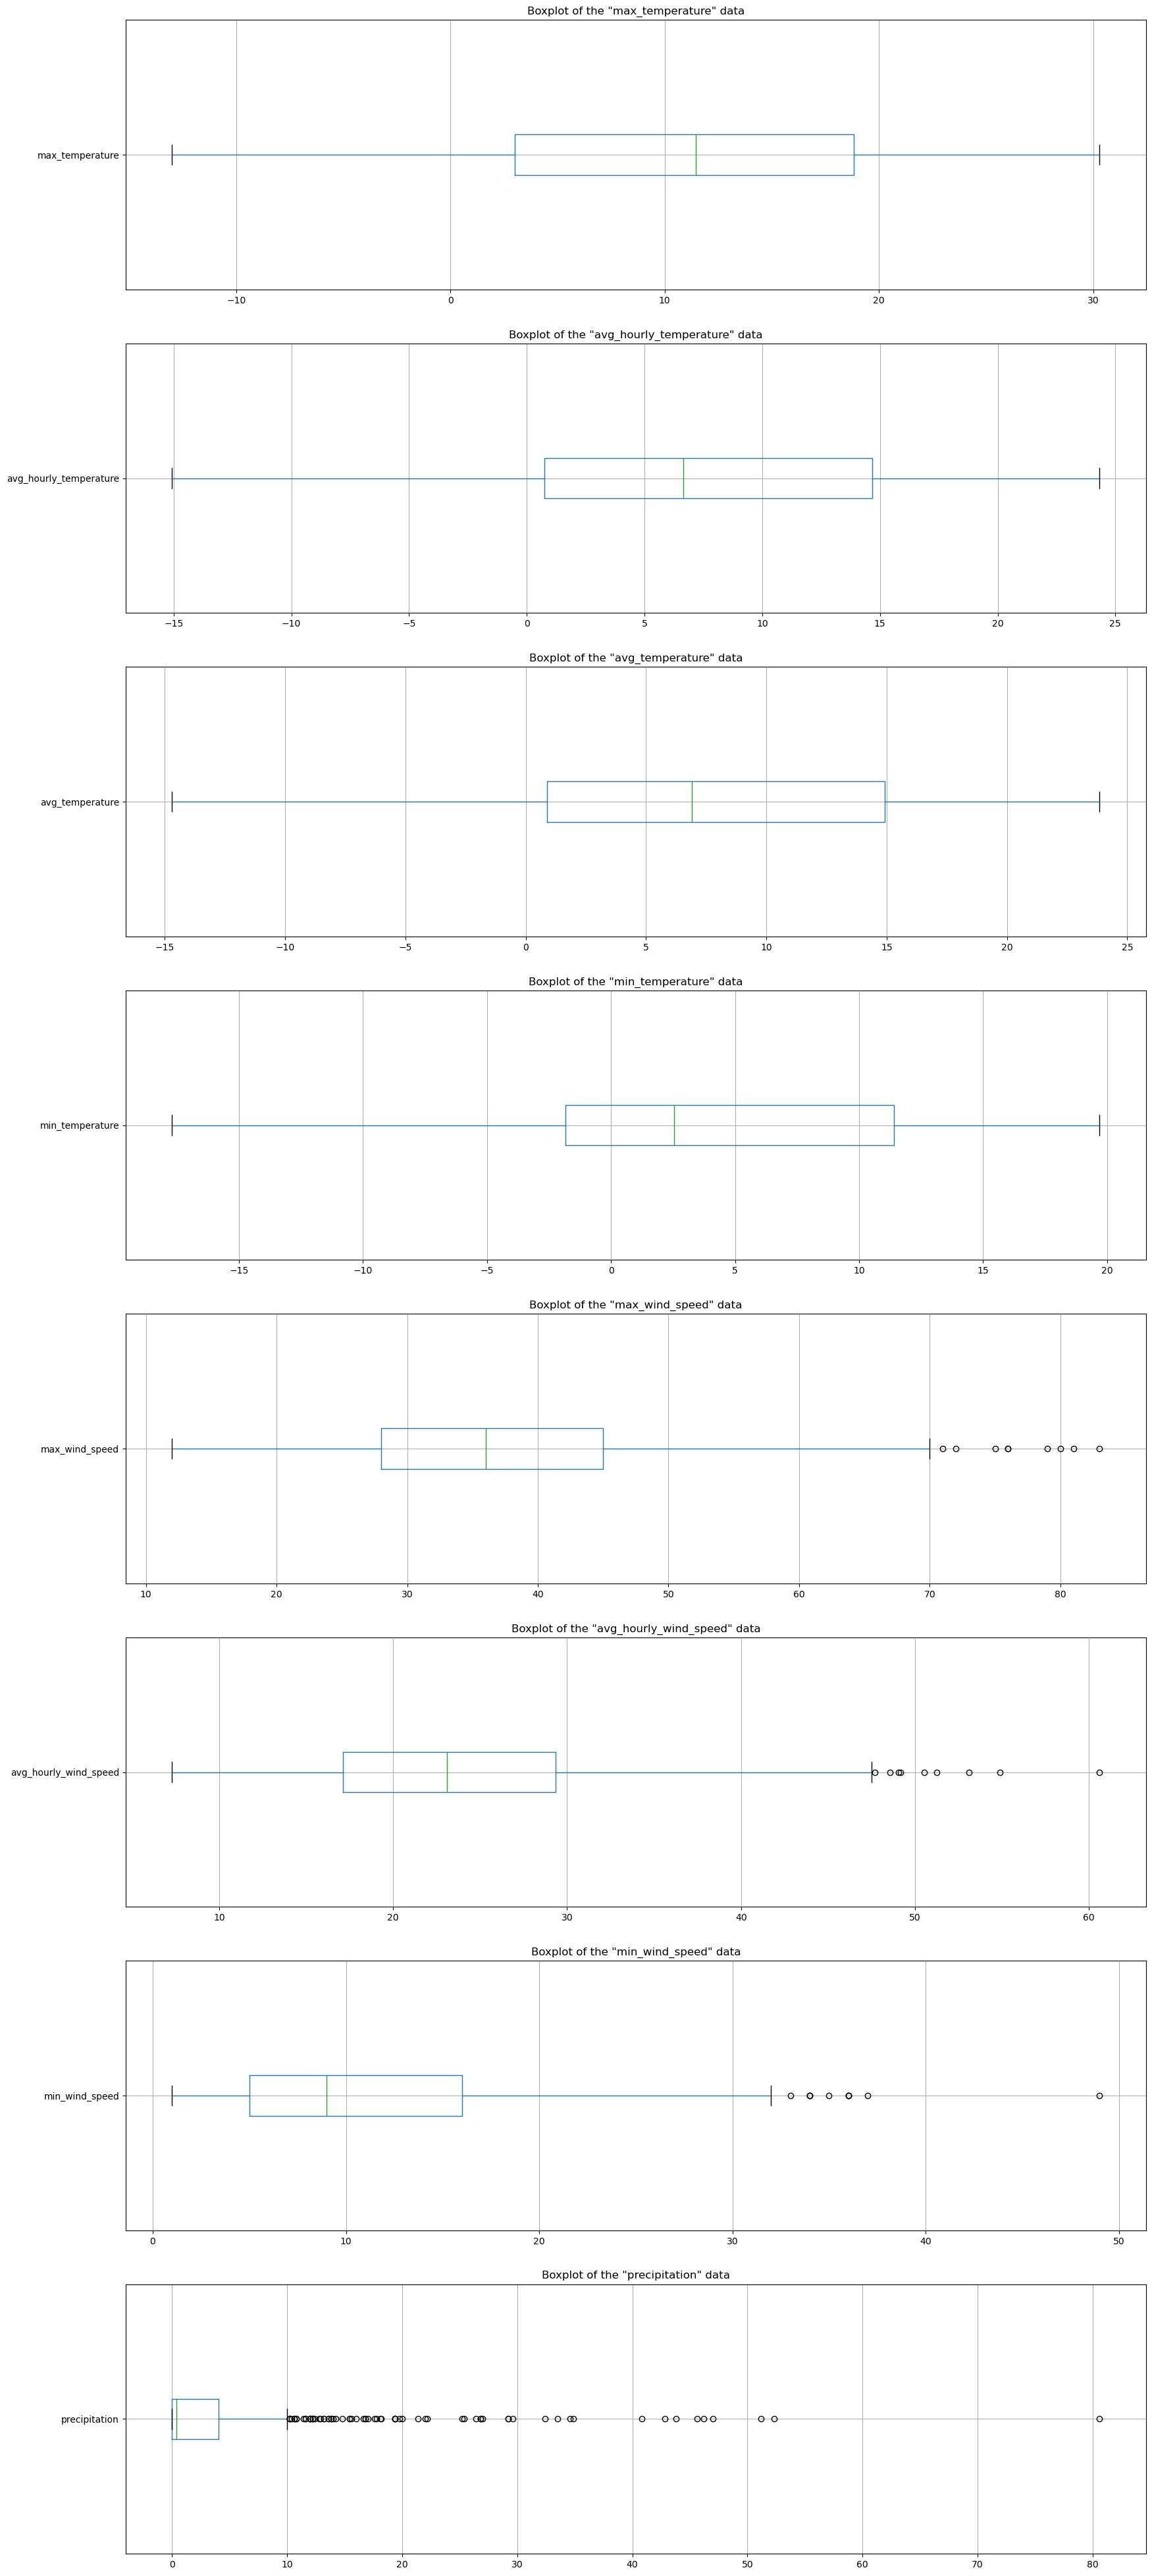

In [4]:
boxplots(df, df.columns)

## Descriptive Statistics

In [3]:
df.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,precipitation
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,11.339500,7.316550,7.535367,3.733167,36.838333,23.847683,11.23500,3.875333
std,9.439852,8.470733,8.668497,8.240108,12.513320,8.945891,7.75586,8.323442
min,-13.000000,-15.070000,-14.700000,-17.700000,12.000000,7.290000,1.00000,0.000000
25%,3.000000,0.735000,0.897500,-1.825000,28.000000,17.120000,5.00000,0.000000
50%,11.450000,6.640000,6.900000,2.550000,36.000000,23.100000,9.00000,0.400000
75%,18.825000,14.672500,14.917500,11.400000,45.000000,29.342500,16.00000,4.025000
max,30.300000,24.330000,23.850000,19.700000,83.000000,60.610000,49.00000,80.600000


## Time Series Illustration

In [8]:
# we define a function to automatically plot each attribute time series.
def time_plot(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20, 50))
    axs = axs.flatten()
    i=0
    for c in columns:
        # df[c].plot(ax=axs[i])
        sns.lineplot(data=df, x=df.index, y=c, ax=axs[i]) #label='Max Temperature', color='red'
        axs[i].set(title=f'Plot of the \"{c}\" data   [{c} values VS. Time]')
        i+=1
    plt.show()

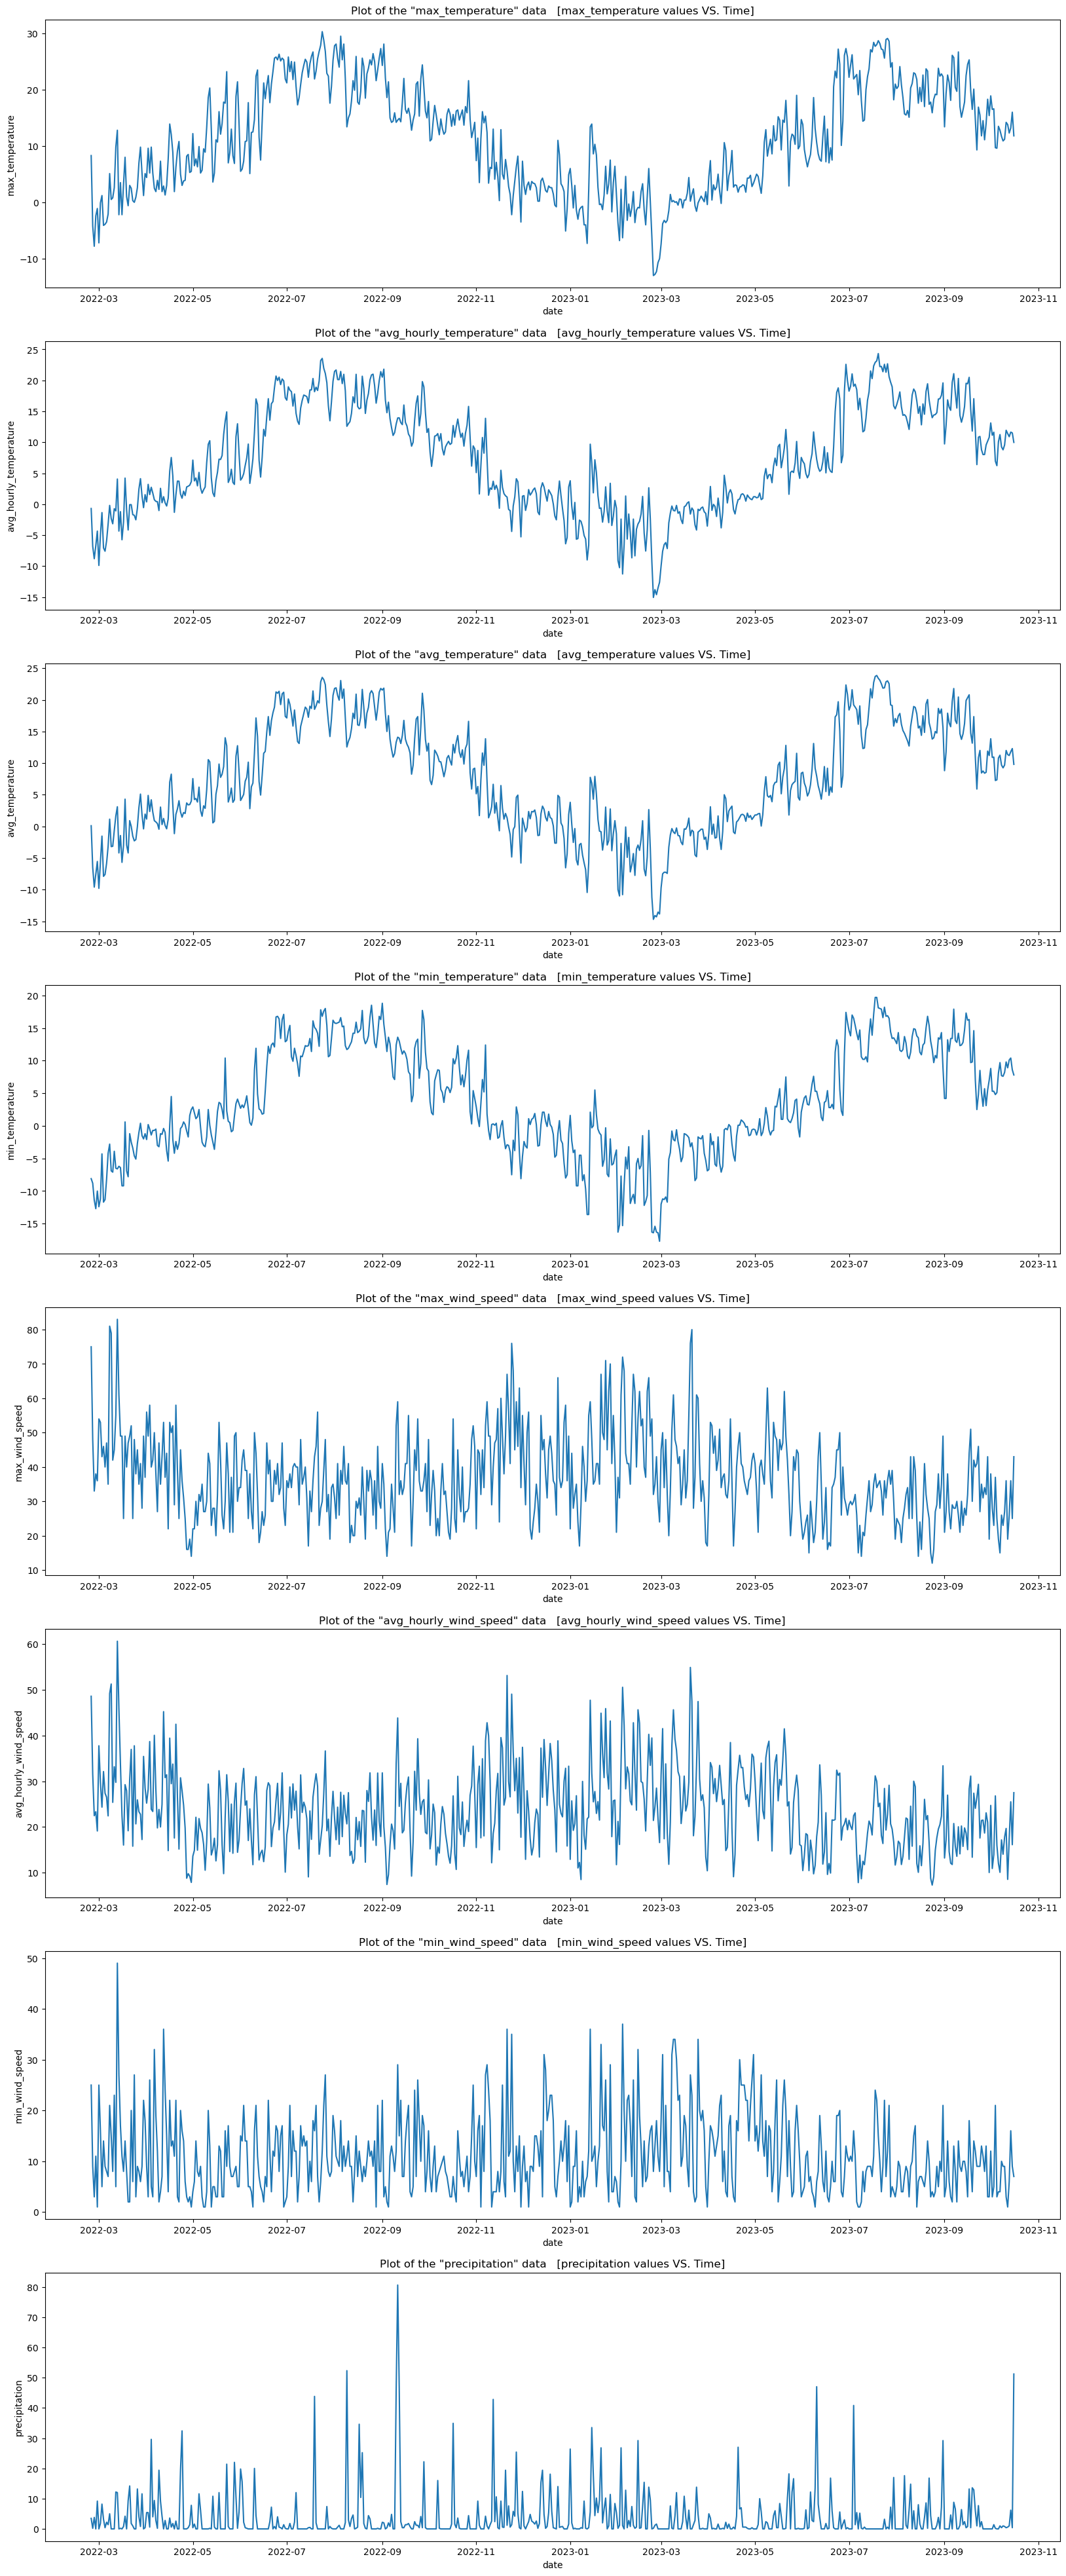

In [9]:
time_plot(df, df.columns)

## Removing Outliers

### Interquartile Range Method

In [4]:
def remove_outliers_IQR(df, columns, scale=1.5, mode="replace"):
    outliers = pd.DataFrame()
    for c in columns:
        q1=df[c].quantile(0.25)
        q3=df[c].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - scale*iqr
        high_lim = q3 + scale*iqr
        # To show what percentage of each column are outliers
        Outs = df[c][(df[c] >= high_lim) | (df[c] <= low_lim)]
        Out_Ratio = 100*(len(Outs)/len(df[c]))
        print(f"Outliers Ratio of {c} was: %{np.round(Out_Ratio, 2)}")
        # print(f"High Limit of ({c}): {high_lim};\t Low Limit of ({c}): {low_lim}")

        ## We can replace or remove the outliers based on our goal.
        ## which can be defined by the keyword "mode": replace/remove
        if mode == "remove":
            indexes = df[c][(df[c] > high_lim) | (df[c] < low_lim)].index
            df.loc[indexes, c] = np.nan # replace outliers with nan
        else:
            df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c])) # replace
        
    print("\n")
    df.info()

We create a function to plot two dataframes together:
the original one and the modified dataframe resulted from the methods we are applying to it.

In [1]:
def plot_orig_modif_series(original, modified, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(22,30))
    axs = axs.flatten()
    x_range = (original.index.min(), original.index.max())
    i = 0
    for c in columns:
        # because our data is large, and is measured hourly,
        # we use every n_th row to visualize our data less densely.
        original[c][::5].plot(ax=axs[i], title=c, xlim=x_range, label='Original', linewidth=3, color='black', alpha=1)
        modified[c][::5].plot(ax=axs[i], title=c, xlim=x_range, label='Modified', linewidth=3, color='red', alpha=0.6)
        axs[i].legend(loc='upper right')
        axs[i].set(title=f'{c} values VS. Time')
        
        i+=1

Outliers Ratio of max_temperature was: %0.0
Outliers Ratio of avg_hourly_temperature was: %0.0
Outliers Ratio of avg_temperature was: %0.0
Outliers Ratio of min_temperature was: %0.0
Outliers Ratio of max_wind_speed was: %1.5
Outliers Ratio of avg_hourly_wind_speed was: %1.5
Outliers Ratio of min_wind_speed was: %1.67
Outliers Ratio of precipitation was: %12.17


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2023-10-16 to 2022-02-24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   max_temperature         600 non-null    float64
 1   avg_hourly_temperature  600 non-null    float64
 2   avg_temperature         600 non-null    float64
 3   min_temperature         600 non-null    float64
 4   max_wind_speed          600 non-null    float64
 5   avg_hourly_wind_speed   600 non-null    float64
 6   min_wind_speed          600 non-null    float64
 7   precipitation           600 n

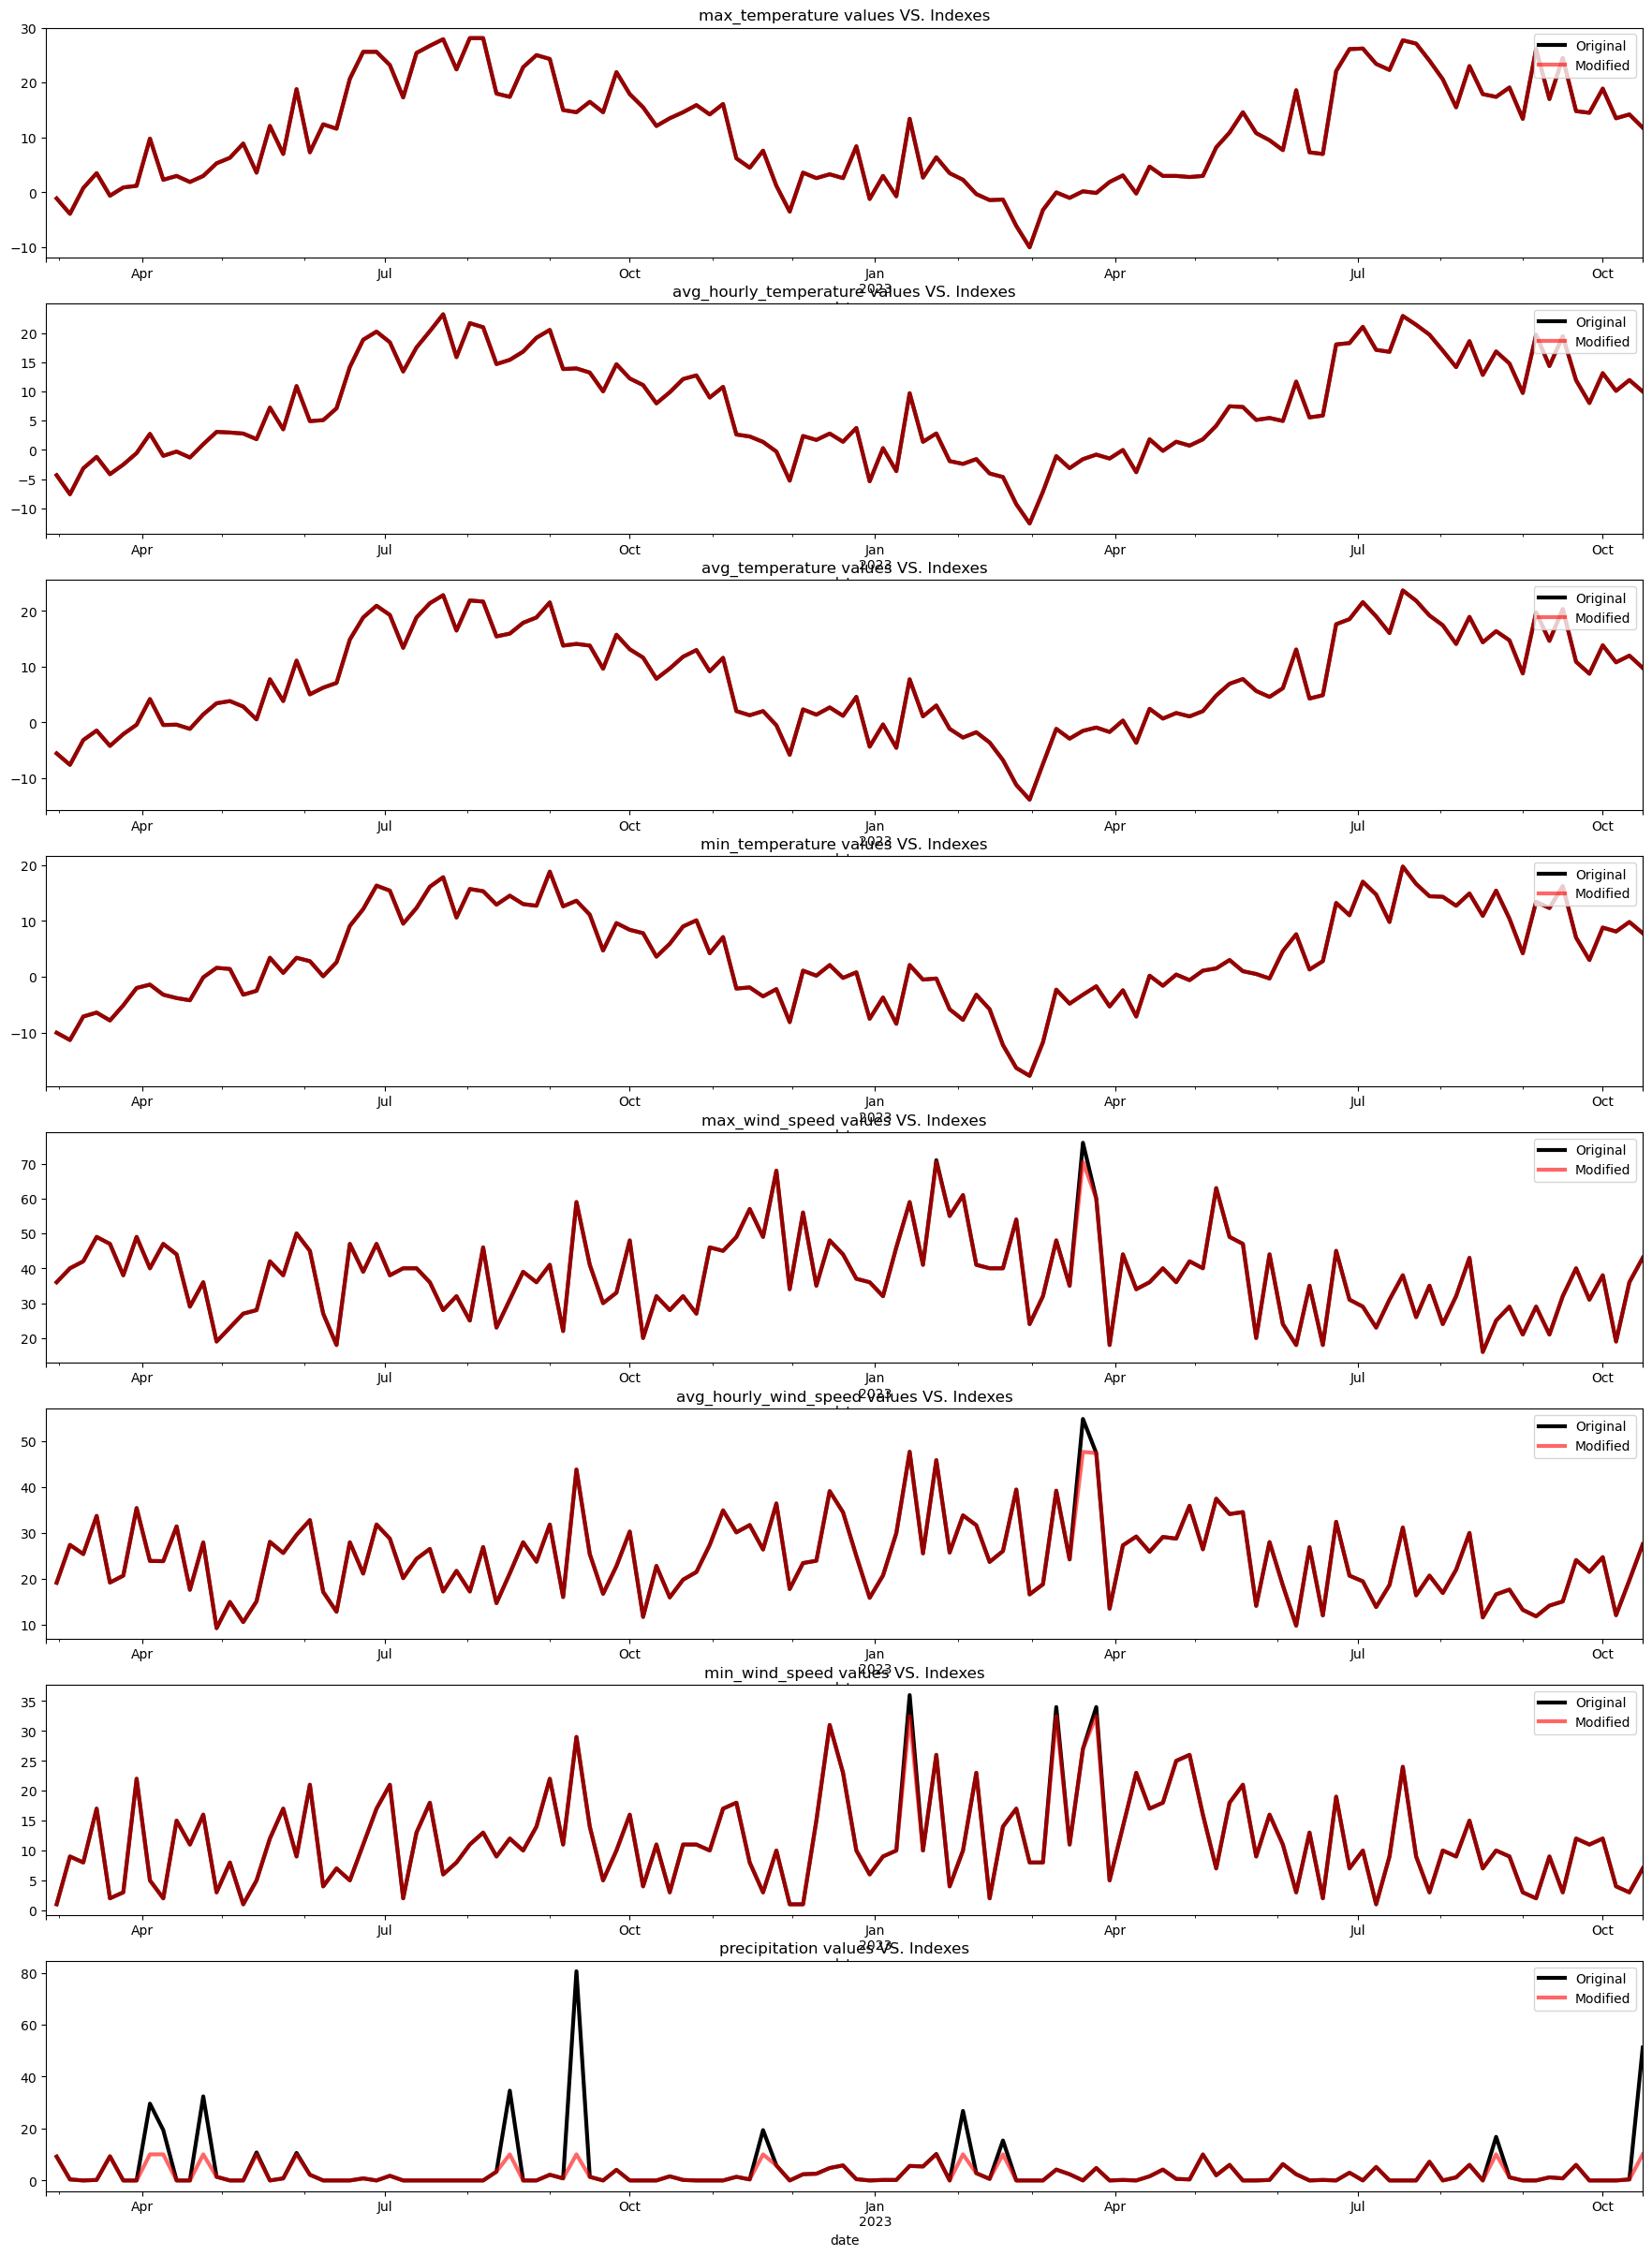

In [6]:
df_iqr = df.copy()        
remove_outliers_IQR(df_iqr, df_iqr.columns, scale=1.5)
plot_orig_modif_series(original=df, modified=df_iqr, columns=df_iqr.columns)

## Trends

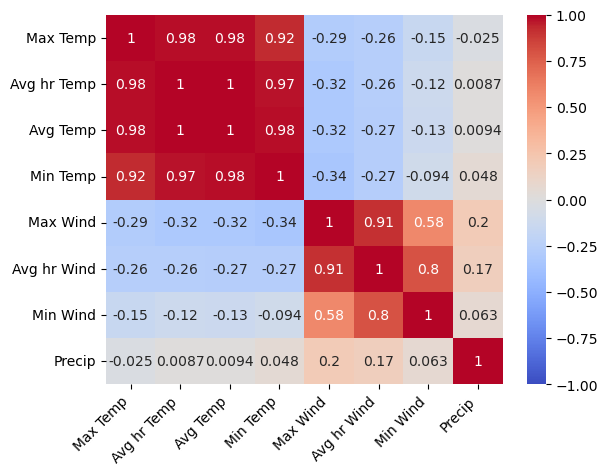

In [14]:
cor_matrix = df.corr()
column_mapping = {
    'max_temperature': 'Max Temp',
    'min_temperature': 'Min Temp',
    'avg_hourly_temperature': 'Avg hr Temp',
    'avg_temperature': 'Avg Temp',
    'max_wind_speed': 'Max Wind',
    'avg_hourly_wind_speed': 'Avg hr Wind',
    'min_wind_speed': 'Min Wind',
    'precipitation': 'Precip'
}
cor_matrix = cor_matrix.rename(columns=column_mapping, index=column_mapping)

sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) #xticklabels=df.index.date, yticklabels=df.index.date
plt.xticks(rotation=45, ha='right')

# plt.figure(figsize=(12, 8))
# plt.xticks(rotation=45, ha='right')

plt.show()

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RepeatedKFold
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#####################################################################################    
train = df[['max_temperature','min_temperature','avg_hourly_temperature','avg_hourly_wind_speed']].copy()

X_whole = train.drop('avg_hourly_wind_speed', axis=1).values
y_whole = train['avg_hourly_wind_speed'].values

scaler = QuantileTransformer(n_quantiles=600)
X_whole = scaler.fit_transform(X_whole)

In [36]:
# Lasso
model = Lasso()

number=21
alpha_range = np.logspace(start=-3, stop=3, num=number, base=10.0)
param_grid = {'alpha': alpha_range}

cv_repeat = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_repeat, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_whole, y_whole)
best_alpha = grid.best_params_["alpha"]
print("best alpha:", best_alpha)

Fitting 15 folds for each of 21 candidates, totalling 315 fits
[CV] END ........................................alpha=0.001; total time=   0.0s


[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ...................

In [37]:
model = Lasso(alpha=best_alpha)
scores = cross_val_score(model, X_whole, y_whole, cv=cv_repeat, scoring='r2', n_jobs=-1)
mean_score = scores.mean()
print(f"Score for Final Reg Model: R2: {mean_score:.5f}")

Score for Final Reg Model: R2: 0.06495
